In [81]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA




In [86]:
# Load data
df = pd.read_csv('UsArrests.csv')
df

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [200]:
df.describe()

,City,Murder,Assault,UrbanPop,Rape
count,50.00000,50.00000,50.000000,50.000000,50.000000
mean,24.50000,7.78800,170.760000,65.540000,21.232000
std,14.57738,4.35551,83.337661,14.474763,9.366385
min,0.00000,0.80000,45.000000,32.000000,7.300000
25%,12.25000,4.07500,109.000000,54.500000,15.075000
50%,24.50000,7.25000,159.000000,66.000000,20.100000
75%,36.75000,11.25000,249.000000,77.750000,26.175000
max,49.00000,17.40000,337.000000,91.000000,46.000000


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     int64  
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 2.1 KB


One can see that there is no missing data, so we can go straight on unsupervised learning

### Inspecting the relation between data by plotting a heatmap

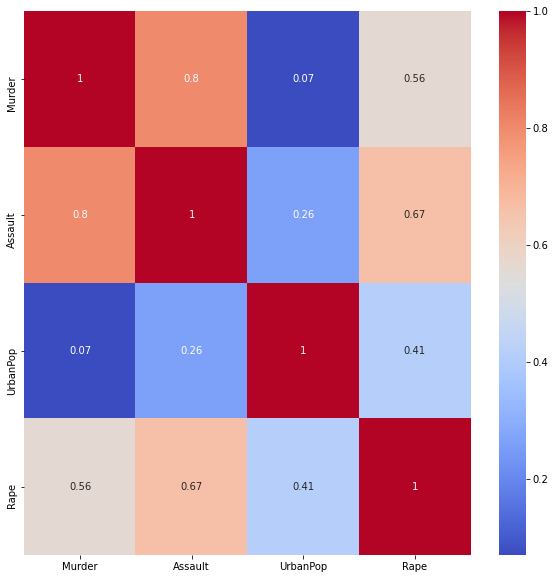

In [70]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap="coolwarm")
plt.savefig('corrplot')
plt.show()

From the plot above, most variables are positively correlated with each other. 
Assault and Murder are hihgly positively correlated, this suggests that most assaults result in murder 
Urban Population and Murder are slightly positively correlated. This is an interesting relation since it shows that there are less murder in the urban population  
Urban Population and Assault are positively correlated. This correlation is slightly more than the previous one. This shows that despite having assaults among urban population. Those assaults do not necessary lead to murder
Rape and murder are fairly correlated which suggests that most of rape results into murder
Assault and Rape are strongly correlated which shows that more assault could results into rape. and that could also suggest that most assaults are done against women who are then raped
Assault and Urban population are moderately correlated
Finally Urban population and rape are fairly correlated which shows that rape is quite a serious issue in the urban population.

In [71]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [87]:
# Preprocessing

# We will drop city column
df1 = df.drop(columns=['City'])



,PC1,PC2,PC3,PC4
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


In [ ]:

# select and standardize features
X = StandardScaler().fit_transform(df1.values)

# choose number of components to be generated
nr_comps = 4
pca = PCA(n_components=nr_comps)

# obtain components
principal_components = pca.fit_transform(X)

# transform the components into a pandas data frame
#pca_df = pd.DataFrame(principal_components, index=df.index)
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3','PC4'])
# This is to include the country code  as the rownames in the PC's
pca_df.head()

In [90]:
# Plotting the first 2 Principal components with the original data and see the correlation they have in the different city. 
fig = px.scatter(principal_components, x=0, y=1, color=df['City'])
fig.show()

The plot generated is interactive. By hovering on a point, one can see the correlation of first two components with regards to that specific state

In [75]:
variance=pca.explained_variance_ratio_
variance

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

The explained variance shows that the first principal component accounts to about 62.01% of contributes to the overall variance of the dataset. The second principal component for 24.74%, the third accounts to 8.91% and the fourth, to 4.34%

In [76]:
cumulative_variance = np.cumsum(np.round(variance, decimals=3))

pc_df = pd.DataFrame(['PC1', 'PC2', 'PC3', 'PC4'], columns=['PC'])
variance_df = pd.DataFrame(variance, columns=['Explained Variance'])
cum_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [77]:
df_explained_variance = pd.concat([pc_df, variance_df, cum_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,PC1,0.620060,0.620
1,PC2,0.247441,0.867
2,PC3,0.089141,0.956
3,PC4,0.043358,0.999


In [178]:
#Plotting the Explained variances of our principal components

import plotly.graph_objects as go

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.show()

In [79]:
#Plotting the Cumulative Explained variances of our principal components
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.show()

From the 2 graphs above, it can be seen that the first 2 principal components explain over 80% of the variance,
We can therefore use them to perform cluster analysis

## Cluster Analysis

In [102]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

### 1. Hierarchical Clustering

In [182]:
# Selecting useful features based on their correlation discussed above
X = df[['Murder','Assault']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)


Data size:
(50, 2)


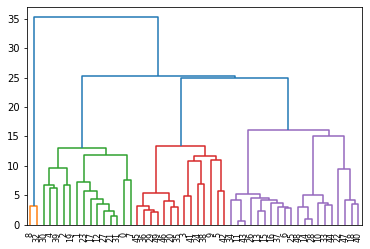

In [183]:
# Performing hierarchical clustering sing "Single" linkage method and "euclidean" distance metric
Z=linkage(df[['Murder', 'Assault']], method='single',metric='euclidean')
dn=dendrogram(Z)
plt.show()

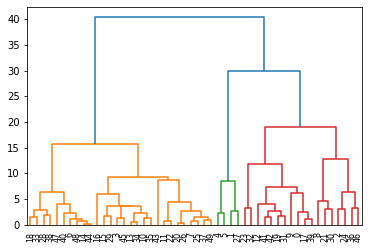

In [120]:
# Performing hierarchical clustering sing "Complete" linkage method and "euclidean" distance metric
Z=linkage(df[['Murder', 'Assault']], method='complete',metric='euclidean')
dn=dendrogram(Z)
plt.show()

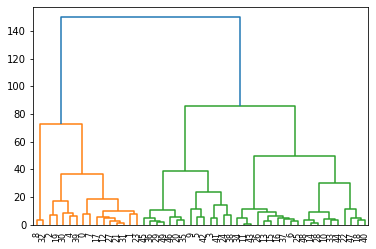

In [185]:
# Performing hierarchical clustering sing "Average" linkage method and "euclidean" distance metric
Z=linkage(df[['Murder', 'Assault']], method='average',metric='euclidean')
dn=dendrogram(Z)
plt.show()

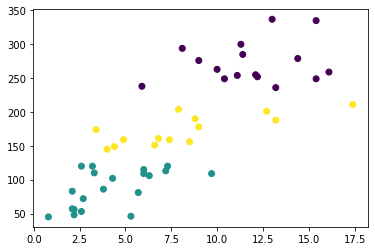

In [186]:
# From the dendrogram with "Average" linkage method and "euclidean" distance metric
# We pick 3 clusters

K=3
L = 'average'
cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=L)
cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster.labels_)

In [187]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, silhouette_score
cluster_labels = cluster.fit_predict(X)
score= silhouette_score(X, cluster_labels)
print("The average silhouette_score is :", score)

The average silhouette_score is : 0.6132747140561386


### 2. K_Means Algorithm

<AxesSubplot:xlabel='Murder', ylabel='Assault'>

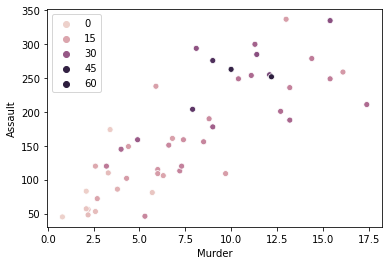

In [188]:
sns.scatterplot(x='Murder', y='Assault', data=df, hue=df.Rape.tolist())

In [189]:
#Building our model

from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

In [190]:
#Fitting our data to the model
model.fit(X)

KMeans(n_clusters=3)

In [191]:
from sklearn.preprocessing import LabelEncoder
y=df['City']
le = LabelEncoder()

df['City'] = le.fit_transform(df['City'])

y = le.transform(y)


In [192]:
model_labels=model.fit_predict(X)

In [193]:
score = round(silhouette_score(X, model_labels, metric='euclidean'),2)
print("The average silhouette_score is :", score)

The average silhouette_score is : 0.61


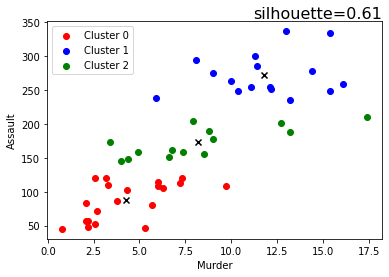

In [194]:
#Creating a scatter plot with silhouette score
def scatter_Kmeans(x, k, r=123):
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Murder')
    plt.ylabel('Assault')
    plt.legend()
    plt.show()

scatter_Kmeans(X, 3, r=0)


Both clustering methods give us a score of 61%